In [1]:
!git clone https://github.com/JoshSahni/CNN-Classifier.git

Cloning into 'CNN-Classifier'...
remote: Enumerating objects: 2741, done.
remote: Counting objects: 100% (48/48), done.
remote: Compressing objects: 100% (48/48), done.
remote: Total 2741 (delta 47), reused 0 (delta 0), pack-reused 2693 (from 1)
Receiving objects: 100% (2741/2741), 359.51 MiB | 54.64 MiB/s, done.
Resolving deltas: 100% (90/90), done.
Updating files: 100% (1773/1773), done.


In [2]:
import os
import matplotlib.pyplot as plt
import tensorflow as tf
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.applications import InceptionResNetV2
from tensorflow.keras import models, layers, optimizers, regularizers
from tensorflow.keras.callbacks import EarlyStopping

print(tf.config.list_physical_devices('GPU'))

[PhysicalDevice(name='/physical_device:GPU:0', device_type='GPU')]


In [3]:
training_path = "/content/CNN-Classifier/Pnemonia dataset/train"

data_generator = ImageDataGenerator(
      rescale=1./255,
      rotation_range=40,
      width_shift_range=0.2,
      height_shift_range=0.2,
      shear_range=0.2,
      zoom_range=0.2,
      horizontal_flip=True,
      validation_split=0.2,
      fill_mode='nearest')

training_generator = data_generator.flow_from_directory(training_path,
                                                    class_mode="binary",
                                                    subset="training",)
validation_generator = data_generator.flow_from_directory(training_path,
                                                    class_mode="binary",
                                                    subset="validation",)

base_model = InceptionResNetV2(weights='imagenet',
                               include_top=False,
                               input_shape=(256, 256, 3))

model = models.Sequential()
model.add(base_model)
model.add(layers.GlobalAveragePooling2D())
model.add(layers.Dense(256, activation='relu', kernel_regularizer=regularizers.l2(0.001)))
model.add(layers.Dropout(0.5))
model.add(layers.Dense(1, activation='sigmoid'))

base_model.trainable = False

Found 1168 images belonging to 2 classes.
Found 291 images belonging to 2 classes.
219055592/219055592 ━━━━━━━━━━━━━━━━━━━━ 1s 0us/step


In [4]:
model.compile(loss='binary_crossentropy',
              optimizer=optimizers.RMSprop(learning_rate=2e-5),
              metrics=['accuracy'])

stopping = EarlyStopping(monitor='val_loss', patience=10, restore_best_weights=True)

history = model.fit(training_generator,
                    epochs=20,
                    validation_data=validation_generator,
                    callbacks=[stopping])

Epoch 1/20


/usr/local/lib/python3.10/dist-packages/keras/src/trainers/data_adapters/py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


37/37 ━━━━━━━━━━━━━━━━━━━━ 86s 1s/step - accuracy: 0.6149 - loss: 1.1361 - val_accuracy: 0.8385 - val_loss: 0.8240
Epoch 2/20
37/37 ━━━━━━━━━━━━━━━━━━━━ 28s 668ms/step - accuracy: 0.8163 - loss: 0.8819 - val_accuracy: 0.8385 - val_loss: 0.7809
Epoch 3/20
37/37 ━━━━━━━━━━━━━━━━━━━━ 28s 658ms/step - accuracy: 0.8305 - loss: 0.8063 - val_accuracy: 0.8419 - val_loss: 0.7537
Epoch 4/20
37/37 ━━━━━━━━━━━━━━━━━━━━ 28s 642ms/step - accuracy: 0.8430 - loss: 0.7767 - val_accuracy: 0.8591 - val_loss: 0.7249
Epoch 5/20
37/37 ━━━━━━━━━━━━━━━━━━━━ 29s 666ms/step - accuracy: 0.8460 - loss: 0.7630 - val_accuracy: 0.8385 - val_loss: 0.7197
Epoch 6/20
37/37 ━━━━━━━━━━━━━━━━━━━━ 28s 654ms/step - accuracy: 0.8599 - loss: 0.7427 - val_accuracy: 0.8763 - val_loss: 0.6945
Epoch 7/20
37/37 ━━━━━━━━━━━━━━━━━━━━ 28s 648ms/step - accuracy: 0.8814 - loss: 0.7081 - val_accuracy: 0.8866 - val_loss: 0.6899
Epoch 8/20
37/37 ━━━━━━━━━━━━━━━━━━━━ 28s 657ms/step - accuracy: 0.8901 - loss: 0.6860 - val_accuracy: 0.8866 -

In [5]:
base_model.trainable = True
set_trainable = False
for layer in base_model.layers:
    if layer.name == 'block8_1_conv':
        set_trainable = True
    if set_trainable:
        layer.trainable = True
    else:
        layer.trainable = False

model.compile(loss='binary_crossentropy',
              optimizer=optimizers.RMSprop(learning_rate=1e-5),
              metrics=['accuracy'])

hist = model.fit(training_generator,
                    epochs=40,
                    validation_data=validation_generator,
                    callbacks=[stopping])

Epoch 1/40
37/37 ━━━━━━━━━━━━━━━━━━━━ 103s 1s/step - accuracy: 0.8387 - loss: 0.7941 - val_accuracy: 0.9072 - val_loss: 0.6525
Epoch 2/40
37/37 ━━━━━━━━━━━━━━━━━━━━ 28s 636ms/step - accuracy: 0.8534 - loss: 0.7231 - val_accuracy: 0.9038 - val_loss: 0.6287
Epoch 3/40
37/37 ━━━━━━━━━━━━━━━━━━━━ 28s 656ms/step - accuracy: 0.8818 - loss: 0.6904 - val_accuracy: 0.9038 - val_loss: 0.6172
Epoch 4/40
37/37 ━━━━━━━━━━━━━━━━━━━━ 28s 644ms/step - accuracy: 0.9098 - loss: 0.6218 - val_accuracy: 0.9141 - val_loss: 0.6140
Epoch 5/40
37/37 ━━━━━━━━━━━━━━━━━━━━ 28s 646ms/step - accuracy: 0.9202 - loss: 0.6135 - val_accuracy: 0.9313 - val_loss: 0.5868
Epoch 6/40
37/37 ━━━━━━━━━━━━━━━━━━━━ 28s 640ms/step - accuracy: 0.9232 - loss: 0.5919 - val_accuracy: 0.9107 - val_loss: 0.6121
Epoch 7/40
37/37 ━━━━━━━━━━━━━━━━━━━━ 28s 650ms/step - accuracy: 0.9341 - loss: 0.5982 - val_accuracy: 0.9244 - val_loss: 0.5833
Epoch 8/40
37/37 ━━━━━━━━━━━━━━━━━━━━ 28s 655ms/step - accuracy: 0.9327 - loss: 0.5801 - val_accura

In [6]:
training_accuracy = history.history['accuracy']
validation_accuracy = history.history['val_accuracy']
training_loss = history.history['loss']
validation_loss = history.history['val_loss']

avg_training_accuracy = sum(training_accuracy) / len(training_accuracy)
avg_validation_accuracy = sum(validation_accuracy) / len(validation_accuracy)
difference = avg_training_accuracy - avg_validation_accuracy

avg_training_loss = sum(training_loss) / len(training_loss)
avg_validation_loss = sum(validation_loss) / len(validation_loss)

print(f"Average Training Accuracy: {avg_training_accuracy:.4f}")
print(f"Average Validation Accuracy: {avg_validation_accuracy:.4f}")
print(f"Difference: {difference:.4f}")

print(f"Average Training loss: {avg_training_loss:.4f}")
print(f"Average Validation loss: {avg_validation_loss:.4f}")

Average Training Accuracy: 0.8719
Average Validation Accuracy: 0.8869
Difference: -0.0151
Average Training loss: 0.7124
Average Validation loss: 0.6782


In [7]:
history.history['accuracy'].extend(hist.history['accuracy'])
history.history['val_accuracy'].extend(hist.history['val_accuracy'])
history.history['loss'].extend(hist.history['loss'])
history.history['val_loss'].extend(hist.history['val_loss'])

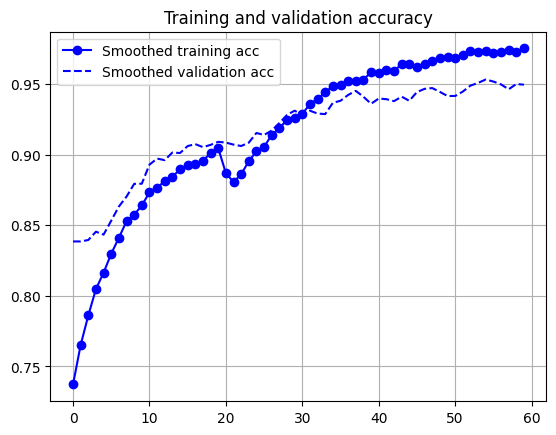

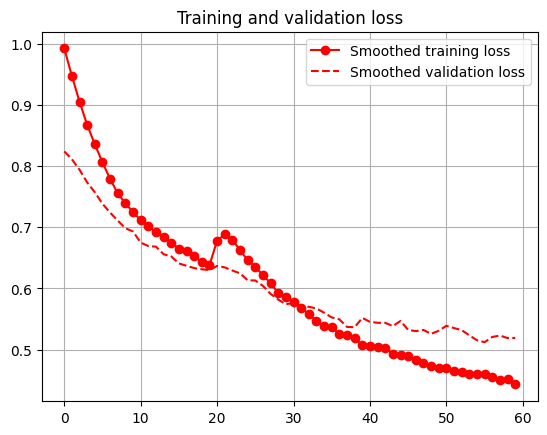

In [8]:
def smooth_curve(points, factor=0.7):
    smooth_points = []
    for point in points:
        if smooth_points:
            previous = smooth_points[-1]
            smooth_points.append(previous * factor + point * (1 - factor))
        else:
            smooth_points.append(point)
    return smooth_points

acc = history.history['accuracy']
validation_acc = history.history['val_accuracy']
loss = history.history['loss']
validation_loss = history.history['val_loss']

epochs = range(len(acc))

plt.plot(epochs,
         smooth_curve(acc), 'bo-', markersize=6, label='Smoothed training acc')
plt.plot(epochs,
         smooth_curve(validation_acc), 'b--', label='Smoothed validation acc')
plt.title('Training and validation accuracy')
plt.legend()
plt.grid(True)

plt.figure()

plt.plot(epochs,
         smooth_curve(loss), 'ro-', markersize=6, label='Smoothed training loss')
plt.plot(epochs,
         smooth_curve(validation_loss), 'r--', label='Smoothed validation loss')
plt.title('Training and validation loss')
plt.legend()
plt.grid(True)

plt.show()

In [1]:
testing_path = "/content/CNN-Classifier/Pnemonia dataset/test"
test_datagen = ImageDataGenerator(rescale=1./255)
test_generator = test_datagen.flow_from_directory(
        testing_path,
        target_size=(256, 256),
        class_mode='binary')

test_loss, test_acc = model.evaluate(test_generator)
print('test acc:', test_acc)

# model.save('InceptionResNetV2.keras')

NameError: name 'ImageDataGenerator' is not defined